# BUSINESS PROBLEM:
      Develop the Model to predict the Customers opting for Term Deposit from the existing bank customers.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Dataset
df=pd.read_csv('/content/Data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
#Chech for NULL values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
#Check for duplicate values
df.duplicated().sum()

0

In [8]:
df.select_dtypes('int').describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# *EDA*

In [9]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

no     0.52616
yes    0.47384
Name: deposit, dtype: float64


<Axes: >

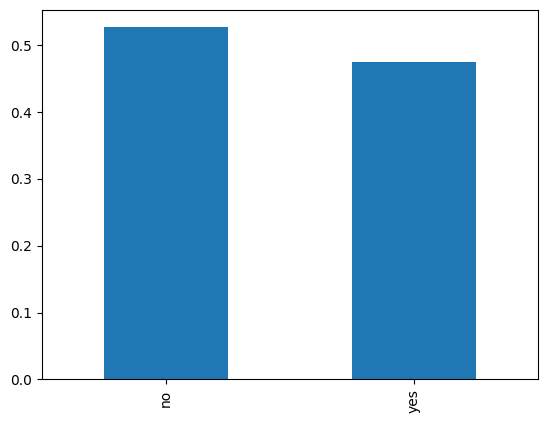

In [10]:
print(df['deposit'].value_counts(normalize=True))
df['deposit'].value_counts(normalize=True).plot(kind='bar')



*   Dependent variable classification is balanced



<Axes: xlabel='age'>

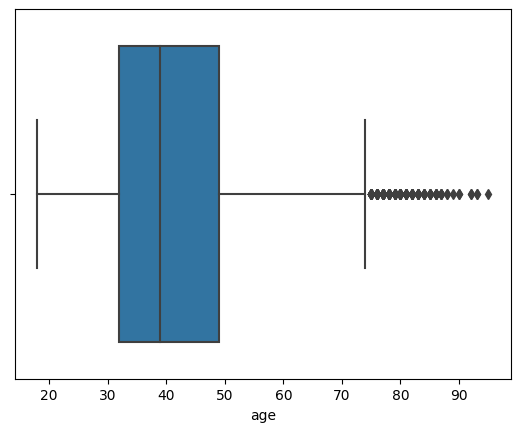

In [11]:
# Checking for Outliers
sns.boxplot(x=df['age'])


<Axes: xlabel='balance'>

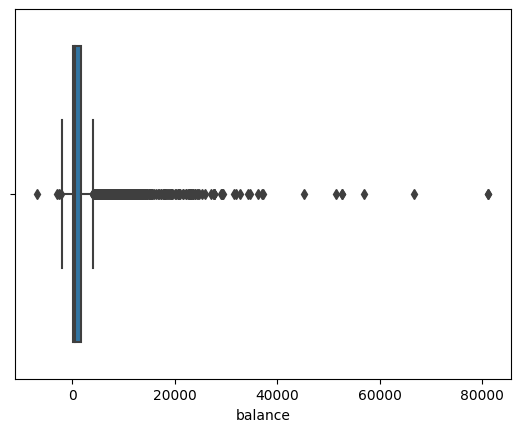

In [12]:
# Checking for Outliers
sns.boxplot(x=df['balance'])



*   Both Age and Balance variables have outliers.



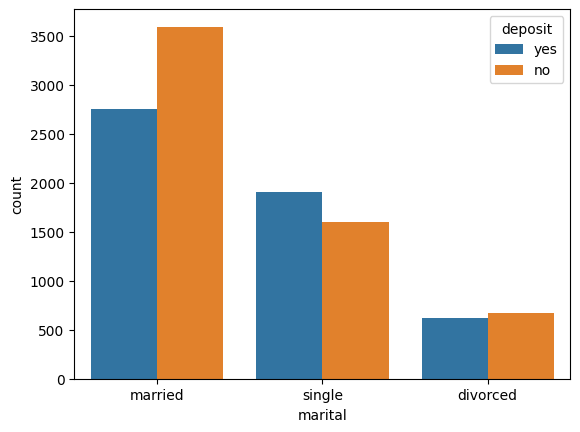

In [13]:
sns.countplot(x=df['marital'], hue=df['deposit'])
plt.show()

In [14]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

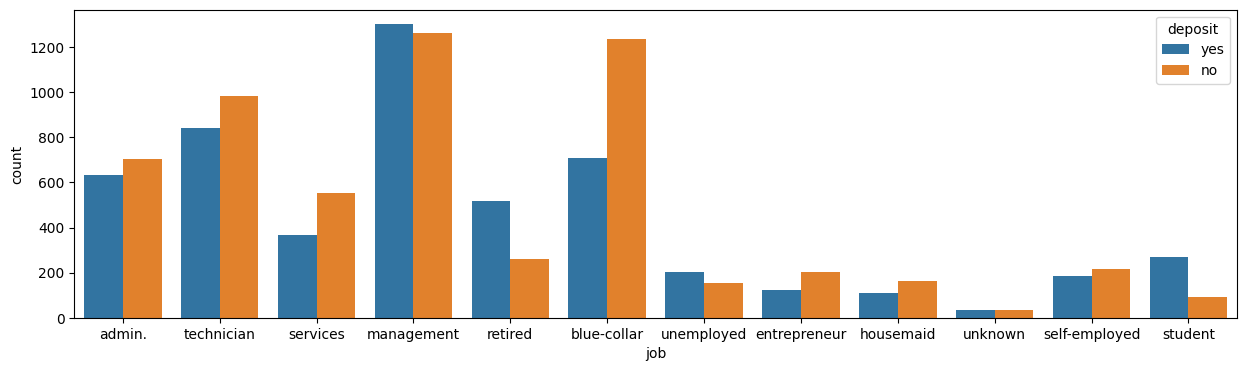

In [15]:
plt.figure(figsize=(15,4))
sns.countplot(x=df['job'], hue=df['deposit'])
plt.show()

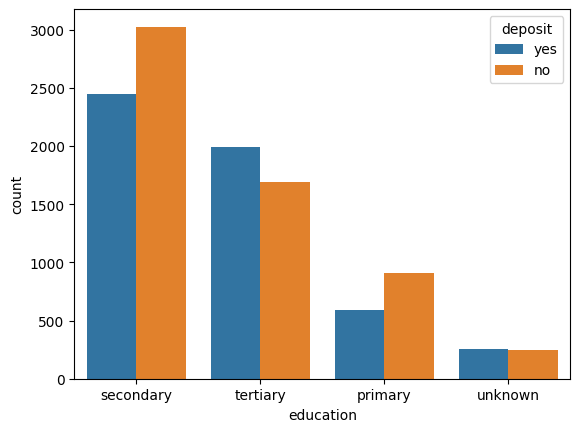

In [16]:
sns.countplot(x=df['education'], hue=df['deposit'])
plt.show()

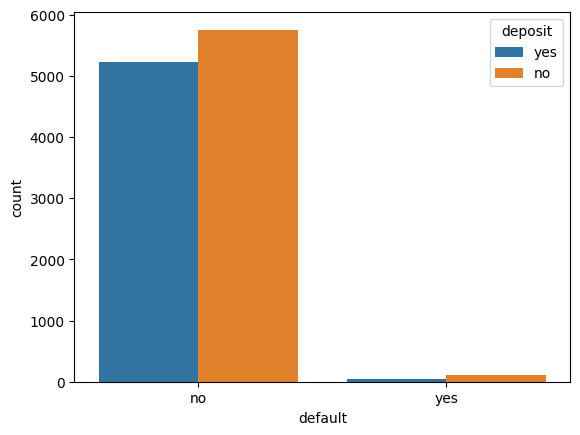

In [17]:
sns.countplot(x=df['default'], hue=df['deposit'])
plt.show()

<Axes: xlabel='balance', ylabel='Count'>

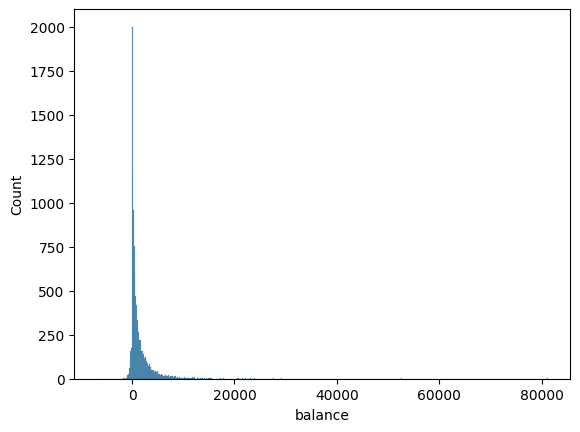

In [18]:
sns.histplot(df['balance'])

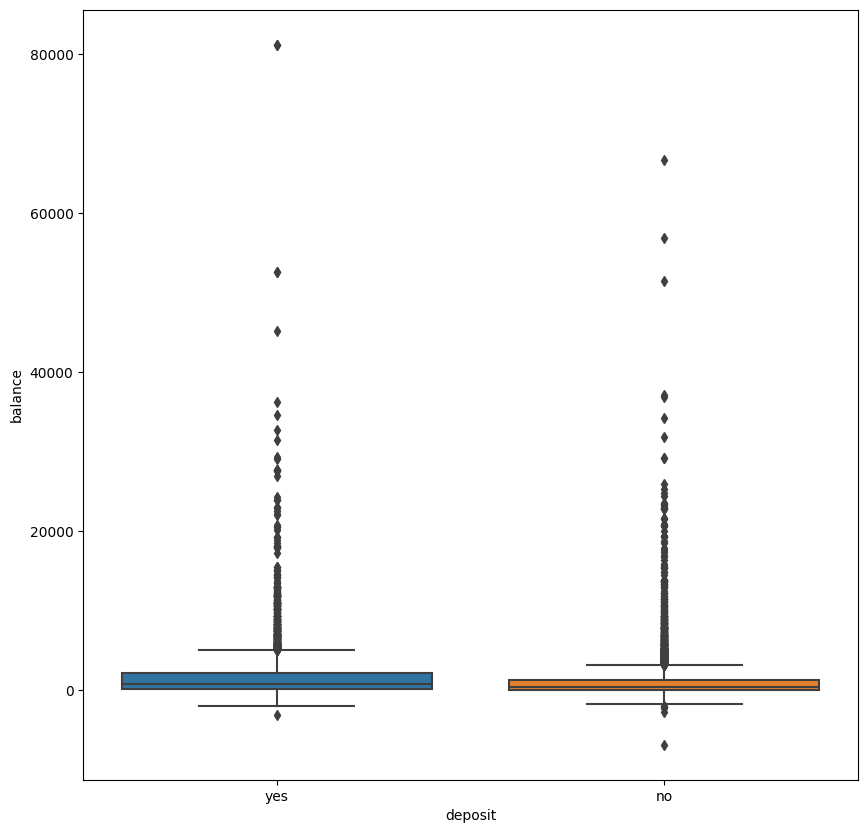

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['deposit'], y=df['balance'])
plt.show()

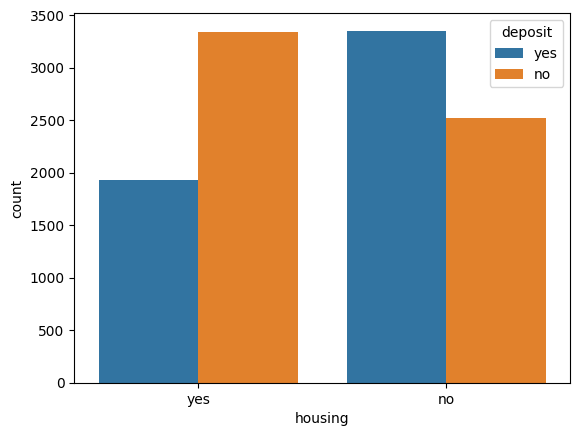

In [20]:
sns.countplot(x=df['housing'], hue=df['deposit'])
plt.show()

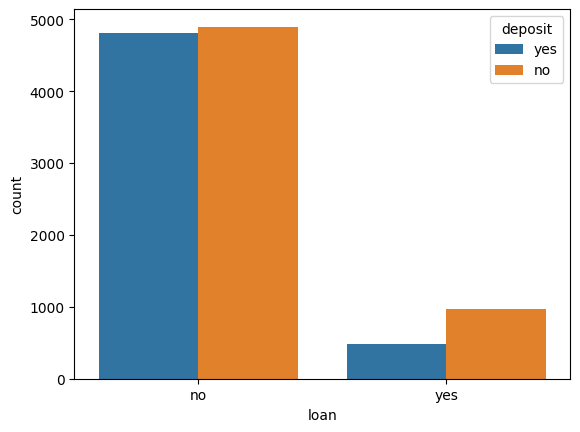

In [21]:
sns.countplot(x=df['loan'], hue=df['deposit'])
plt.show()

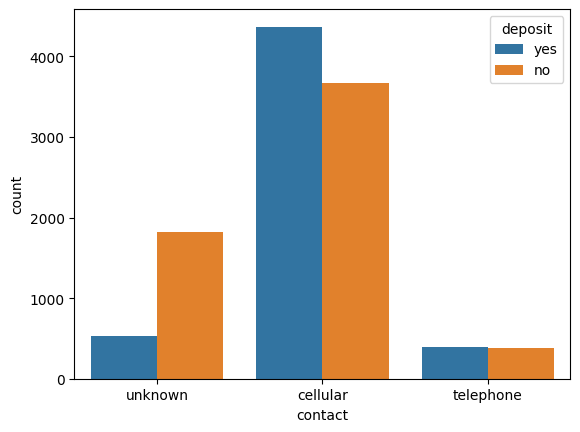

In [22]:
sns.countplot(x=df['contact'], hue=df['deposit'])
plt.show()

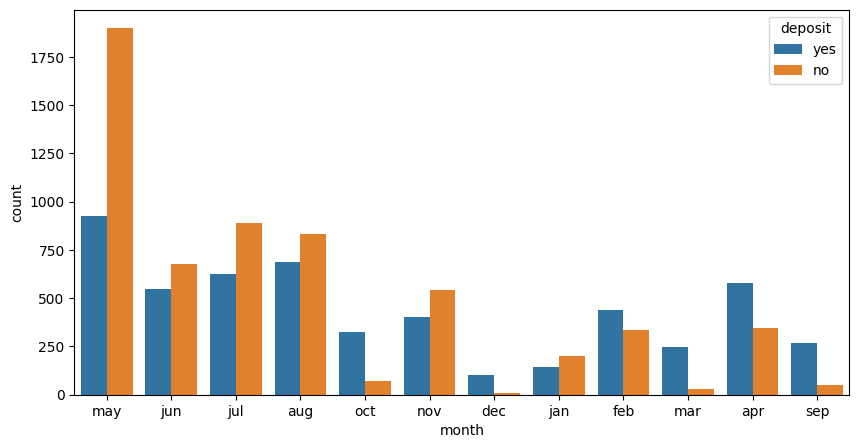

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['month'], hue=df['deposit'])
plt.show()

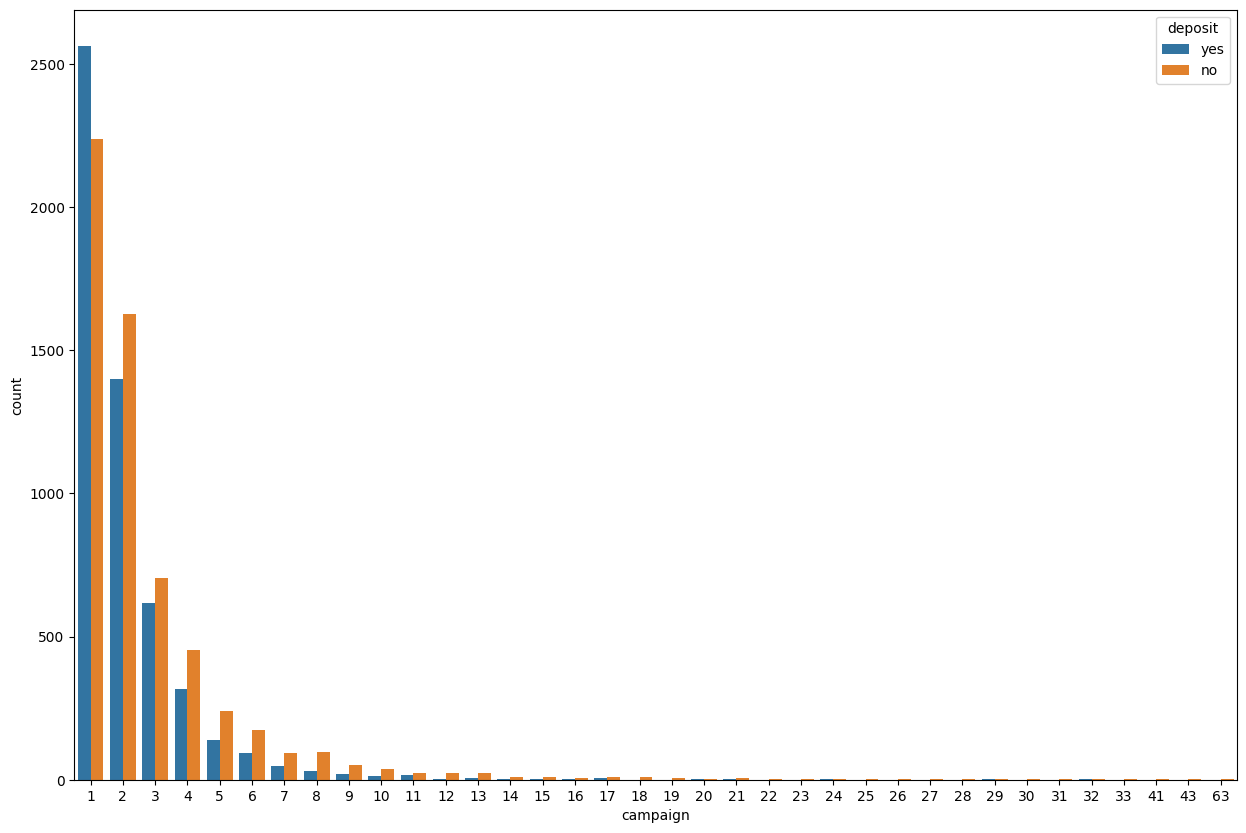

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['campaign'], hue=df['deposit'])
plt.show()

<Axes: xlabel='age', ylabel='Count'>

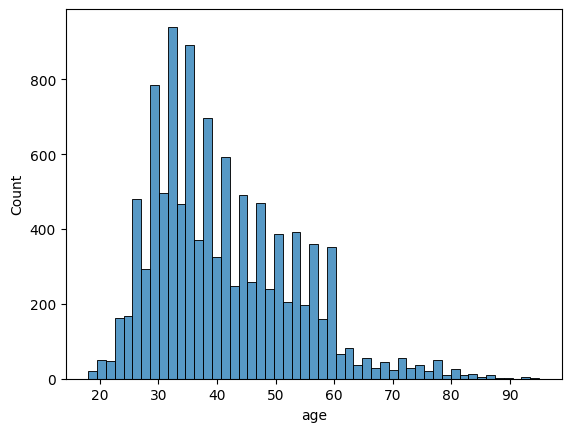

In [25]:
sns.histplot(df['age'])

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


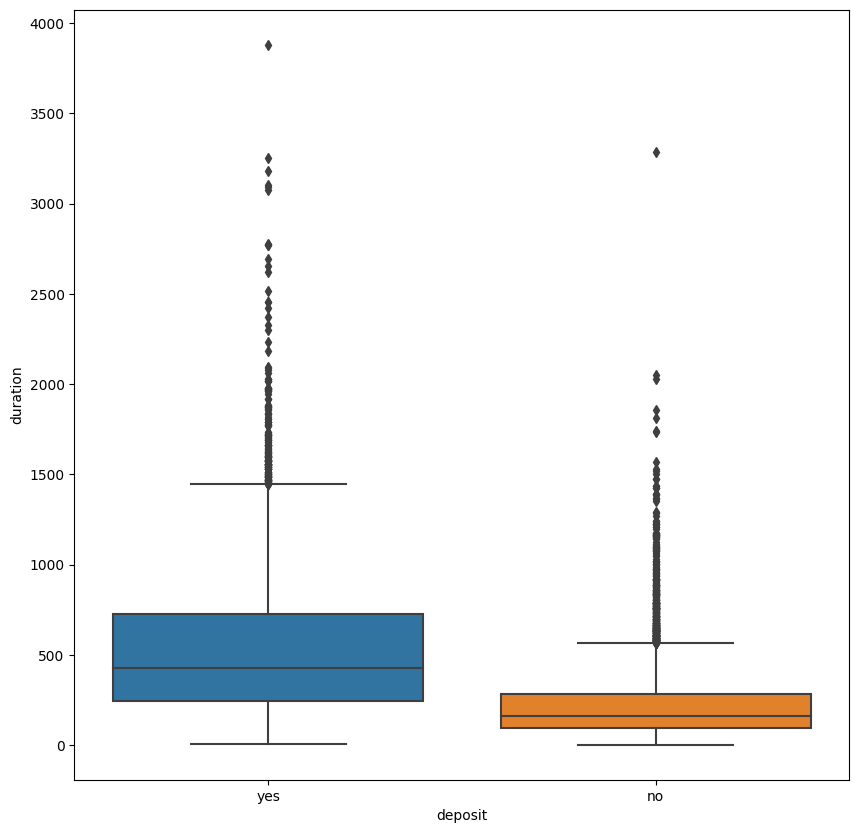

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['deposit'], y=df['duration'])
plt.show()

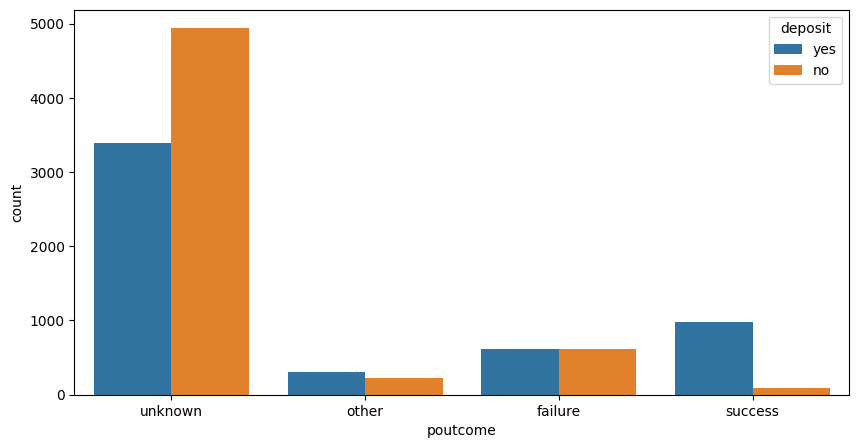

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['poutcome'], hue=df['deposit'])
plt.show()

**Categorcial Encoding**

In [29]:
categorical_variables=df.select_dtypes('object').columns
categorical_variables

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [30]:
df=pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'], drop_first=True)


In [31]:
df.shape

(11162, 43)

In [32]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
# Dependent Variable values into Numerical
df['deposit']=df['deposit'].replace('yes', 1)
df['deposit']=df['deposit'].replace('no', 0)
df.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


<Axes: >

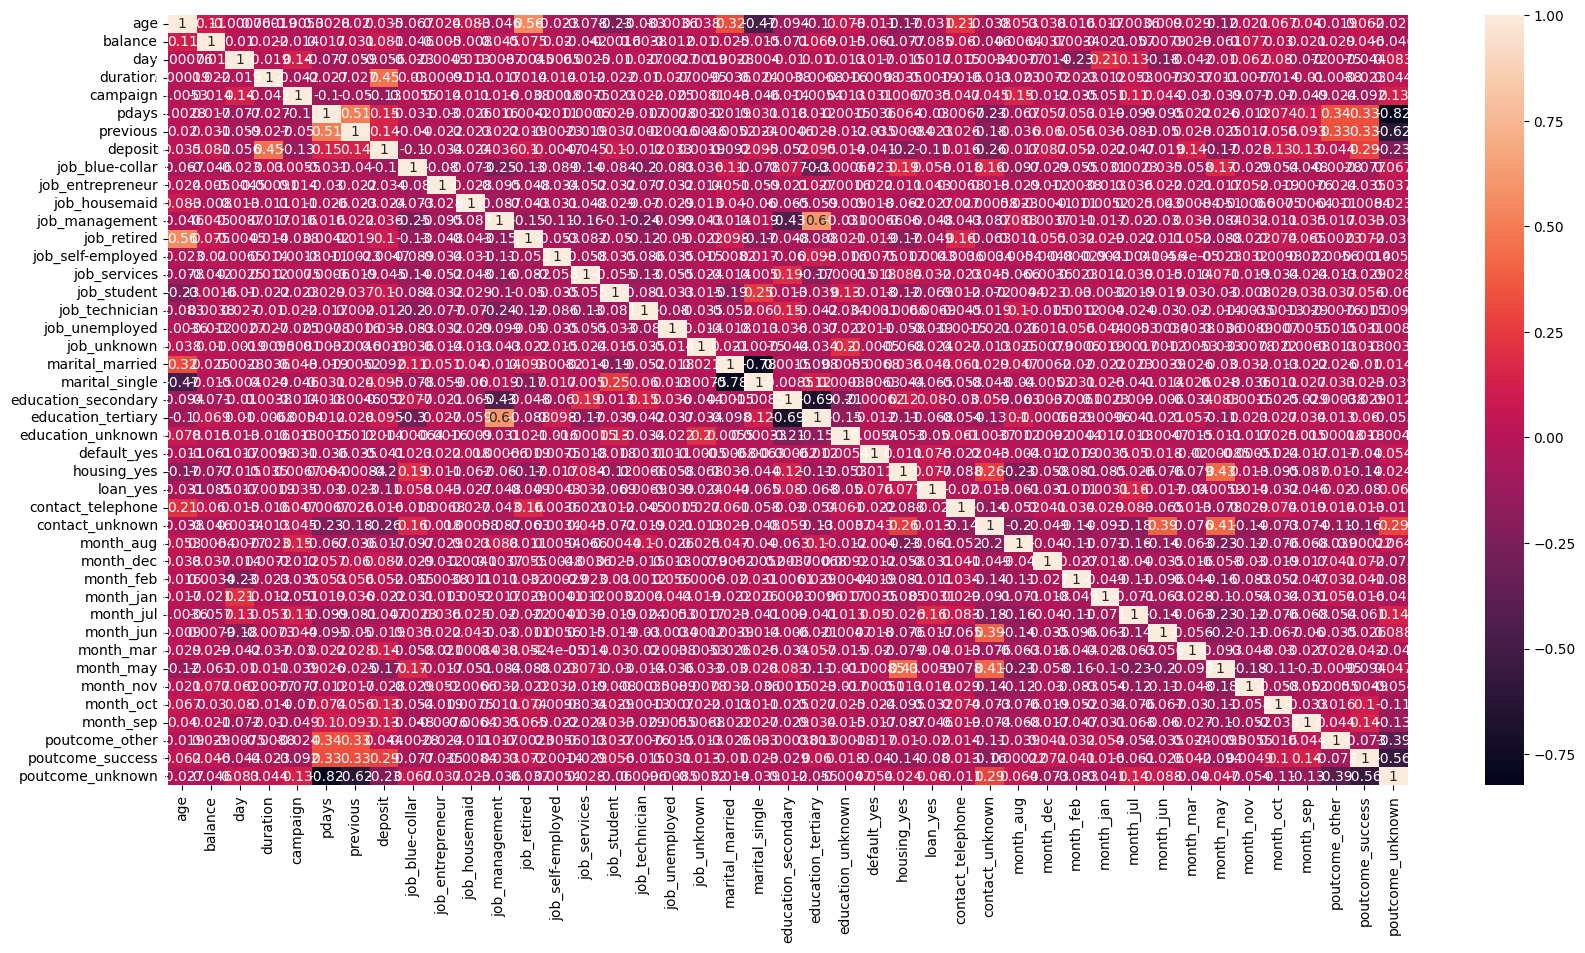

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

In [35]:
# Splitting the dataset into Independent and Target Variables
X=df.drop(columns='deposit')
y=df['deposit']

In [36]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [37]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=9)


In [38]:
print(X_train.shape)
print(X_test.shape)

(8929, 42)
(2233, 42)


In [39]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
X_train

array([[ 1.4824127 , -0.37012271, -0.07277652, ..., -0.2218923 ,
        -0.3247841 ,  0.5816179 ],
       [ 0.98111381, -0.371903  ,  0.99172915, ..., -0.2218923 ,
        -0.3247841 ,  0.5816179 ],
       [-0.68988249, -0.0710335 ,  0.2820587 , ..., -0.2218923 ,
        -0.3247841 ,  0.5816179 ],
       ...,
       [-0.77343231, -0.41225631,  0.63689393, ..., -0.2218923 ,
        -0.3247841 ,  0.5816179 ],
       [-1.77603009, -0.33243984,  0.04550189, ..., -0.2218923 ,
        -0.3247841 ,  0.5816179 ],
       [-0.10503379, -0.3336267 , -0.42761175, ..., -0.2218923 ,
        -0.3247841 , -1.71934187]])

In [41]:
X_train=pd.DataFrame(data=X_train, columns=X.columns)
X_test=pd.DataFrame(data=X_test, columns=X.columns)

# Modelling

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()
lc.fit(X_train, y_train)

train_pred=lc.predict(X_train)
test_pred=lc.predict(X_test)

print('train_accuracy:', accuracy_score(y_train, train_pred))
print('train_accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(lc, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

train_accuracy: 0.827192294769851
train_accuracy: 0.8217644424540976
CV: 0.7771926719924496
[[1015  180]
 [ 218  820]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1195
           1       0.82      0.79      0.80      1038

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(knn, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8369358270803001
Test accuracy: 0.781012091356919
CV: 0.7370516302385045
[[1012  183]
 [ 306  732]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1195
           1       0.80      0.71      0.75      1038

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [ ]:
# Hyperparameter Tuning of KNN
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={'n_neighbors': list(range(1,21)), 'p': [1,2]}
knnn=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
knnn.fit(X_train, y_train)
knnn.best_params_

"from sklearn.model_selection import GridSearchCV\nestimator=KNeighborsClassifier()\nparam_grid={'n_neighbors': list(range(1,21)), 'p': [1,2]}\nknnn=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')\nknnn.fit(X_train, y_train)\nknnn.best_params_"

In [ ]:
# Final KNN Model with best Parameters.
knn_new=KNeighborsClassifier(n_neighbors=11, p=1)
knn_new.fit(X_train, y_train)

train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(knn_new, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8369358270803001
Test accuracy: 0.781012091356919
CV: 0.7555958440274346
[[1012  183]
 [ 306  732]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1195
           1       0.80      0.71      0.75      1038

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



**Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

train_pred=dt.predict(X_train)
test_pred=dt.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(dt, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 1.0
Test accuracy: 0.7895208240035826
CV: 0.7418978839724113
[[965 230]
 [240 798]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1195
           1       0.78      0.77      0.77      1038

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [43]:
# Hyperparameter Tuning of Decision Tree
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier()
param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9]}
dtt=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
dtt.fit(X_train, y_train)
dtt.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [44]:
dtt.best_estimator_.feature_importances_

array([0.01386689, 0.02709169, 0.01946413, 0.51376965, 0.00322528,
       0.01187719, 0.00367031, 0.        , 0.00152641, 0.        ,
       0.00124296, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00361306, 0.00134555,
       0.        , 0.        , 0.00255846, 0.        , 0.04754472,
       0.00252083, 0.        , 0.1153648 , 0.00106385, 0.        ,
       0.00574313, 0.        , 0.00559706, 0.00752086, 0.03275672,
       0.00634507, 0.00225893, 0.02905283, 0.00069448, 0.00152362,
       0.13638155, 0.00237999])

<Axes: >

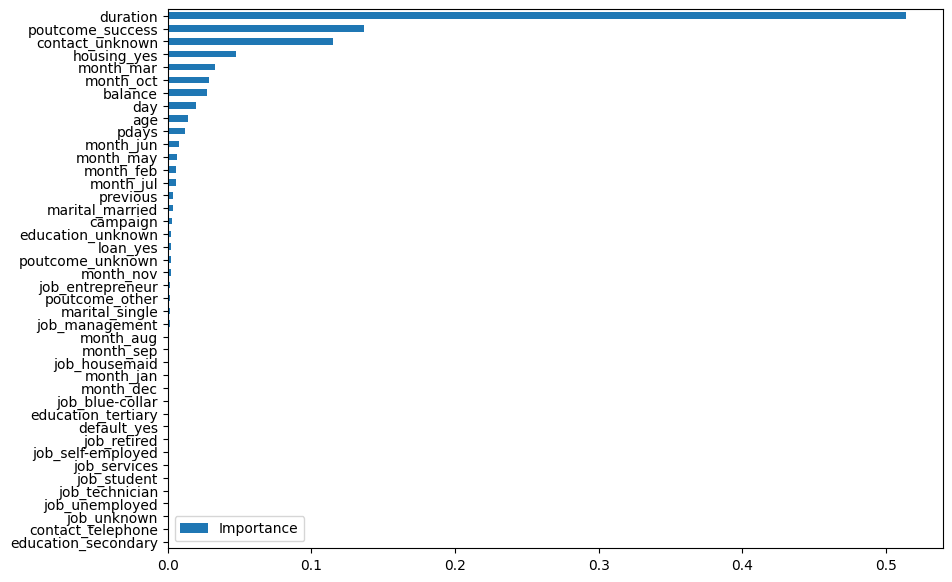

In [45]:
feats=pd.DataFrame(data=dtt.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])
feats=feats.sort_values(by='Importance')
feats.plot(kind='barh', figsize=(10, 7))

In [46]:
imp_features=feats[feats['Importance']>0].index.tolist()

print(len(imp_features))

27


In [47]:
X_train_new= X_train[imp_features]

X_test_new=X_test[imp_features]

In [ ]:
X_train_new.shape

(8929, 26)

In [ ]:
# Final Decision Tree Model with best Parameters.
dt_new=DecisionTreeClassifier(criterion='gini', max_depth=7)
dt_new.fit(X_train_new, y_train)

train_pred=dt_new.predict(X_train_new)
test_pred=dt_new.predict(X_test_new)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(dt_new, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8293201926307537
Test accuracy: 0.8222122704881325
CV: 0.768505971843013
[[986 209]
 [188 850]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1195
           1       0.80      0.82      0.81      1038

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

train_pred=rf.predict(X_train)
test_pred=rf.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(rf, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 1.0
Test accuracy: 0.8669950738916257
CV: 0.8052423969554114
[[1006  189]
 [ 108  930]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1195
           1       0.83      0.90      0.86      1038

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233



In [ ]:
# Hyperparameter Tuning of Random Forest
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=0)
param_grid={'n_estimators': list(range(1,101))}
rff=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
rff.fit(X_train, y_train)
rff.best_params_

{'n_estimators': 79}

In [ ]:
rff.best_estimator_.feature_importances_

array([0.08149558, 0.08157521, 0.07132274, 0.32936628, 0.03614375,
       0.03375083, 0.02081917, 0.00813613, 0.00338769, 0.00288582,
       0.00899009, 0.00494967, 0.0038063 , 0.0054    , 0.00546714,
       0.00881177, 0.00398947, 0.00114108, 0.01062916, 0.0100253 ,
       0.01108021, 0.01058522, 0.00428082, 0.00157241, 0.02667784,
       0.01019723, 0.00593982, 0.03447909, 0.0113868 , 0.00226128,
       0.00860625, 0.00618607, 0.01069295, 0.00978552, 0.01538743,
       0.01384036, 0.00899598, 0.01193033, 0.00698396, 0.0027256 ,
       0.03749469, 0.01681693])

<Axes: >

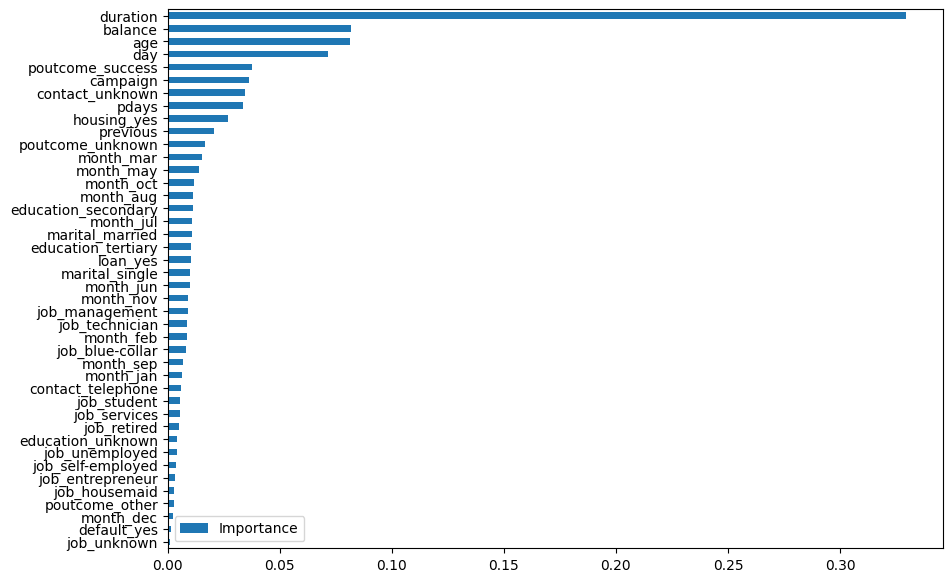

In [ ]:
feats=pd.DataFrame(data=rff.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])
feats=feats.sort_values(by='Importance')
feats.plot(kind='barh', figsize=(10, 7))

In [ ]:
imp_features=feats[feats['Importance']>0.01].index.tolist()
print(len(imp_features))
imp_features

21


Index(['marital_single', 'loan_yes', 'education_tertiary', 'marital_married',
       'month_jul', 'education_secondary', 'month_aug', 'month_oct',
       'month_may', 'month_mar', 'poutcome_unknown', 'previous', 'housing_yes',
       'pdays', 'contact_unknown', 'campaign', 'poutcome_success', 'day',
       'age', 'balance', 'duration'],
      dtype='object')

In [ ]:
X_train_new=X_train[imp_features]

X_test_new=X_test[imp_features]

In [ ]:
# Final Random Forest Model with best Parameters.
rf_new=RandomForestClassifier(n_estimators=79, random_state=0)
rf_new.fit(X_train_new, y_train)

train_pred=rf_new.predict(X_train_new)
test_pred=rf_new.predict(X_test_new)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(rf_new, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1195
           1       0.82      0.79      0.80      1038

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



**ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)

train_pred=ada.predict(X_train)
test_pred=ada.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(ada, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8292081980064957
Test accuracy: 0.8334079713390058
CV: 0.7782736389799794
[[1021  174]
 [ 198  840]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1195
           1       0.83      0.81      0.82      1038

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [ ]:
# Hyperparameter Tuning of ADA BOOST
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={'n_estimators': list(range(1,51))}
adaa=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
adaa.fit(X_train, y_train)
adaa.best_params_

{'n_estimators': 47}

[0.06382979 0.04255319 0.06382979 0.29787234 0.04255319 0.04255319
 0.0212766  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0212766  0.         0.         0.0212766  0.         0.
 0.04255319 0.0212766  0.         0.0212766  0.0212766  0.0212766
 0.0212766  0.0212766  0.0212766  0.0212766  0.0212766  0.0212766
 0.0212766  0.04255319 0.0212766  0.         0.04255319 0.        ]


<Axes: >

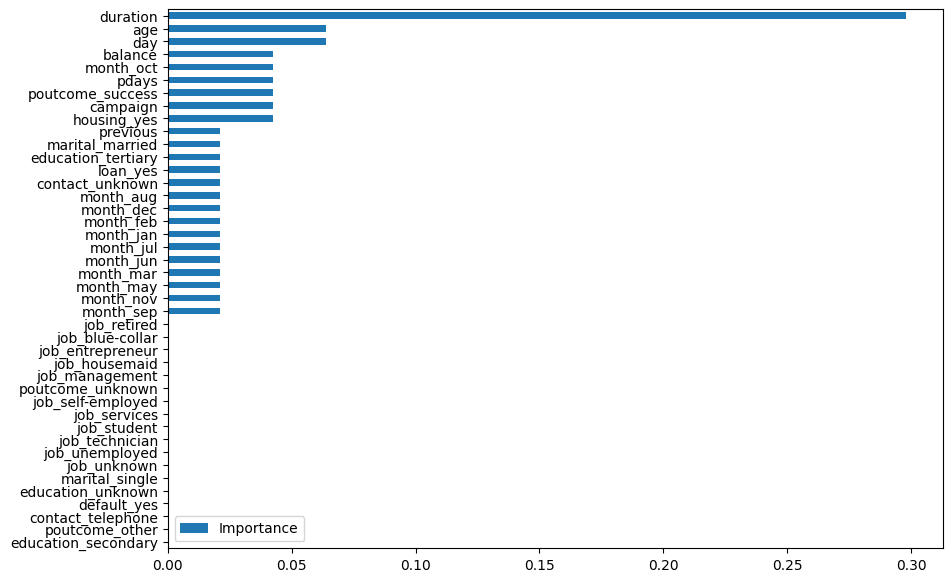

In [ ]:
print(adaa.best_estimator_.feature_importances_)
feats=pd.DataFrame(data=adaa.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])
feats=feats.sort_values(by='Importance')
feats.plot(kind='barh', figsize=(10, 7))

In [ ]:
imp_features=feats[feats['Importance']>0.01].index.tolist()
print(len(imp_features))
imp_features

24


Index(['month_sep', 'month_nov', 'month_may', 'month_mar', 'month_jun',
       'month_jul', 'month_jan', 'month_feb', 'month_dec', 'month_aug',
       'contact_unknown', 'loan_yes', 'education_tertiary', 'marital_married',
       'previous', 'housing_yes', 'campaign', 'poutcome_success', 'pdays',
       'month_oct', 'balance', 'day', 'age', 'duration'],
      dtype='object')

In [ ]:
X_train_new=X_train[imp_features]

X_test_new=X_test[imp_features]

In [ ]:
# Final ADA Boost Model with best Parameters.
ada_new=AdaBoostClassifier(n_estimators=47)
ada_new.fit(X_train_new, y_train)

train_pred=ada_new.predict(X_train_new)
test_pred=ada_new.predict(X_test_new)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(ada_new, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8293201926307537
Test accuracy: 0.8351992834751455
CV: 0.776840027479627
[[1023  172]
 [ 196  842]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1195
           1       0.83      0.81      0.82      1038

    accuracy                           0.84      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.84      0.84      0.84      2233



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)

train_pred=gb.predict(X_train)
test_pred=gb.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(gb, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8565348863254564
Test accuracy: 0.8562472010747872
CV: 0.8082841364543256
[[1011  184]
 [ 137  901]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1195
           1       0.83      0.87      0.85      1038

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



In [ ]:
# Hyperparameter Tuning of Gradient Boost
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier()
param_grid={'n_estimators': list(range(1,51)), 'learning_rate':[0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 1]}
gba=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
gba.fit(X_train, y_train)
gba.best_params_

{'learning_rate': 0.3, 'n_estimators': 46}

[3.35460325e-02 1.43718703e-02 2.63930610e-02 5.20289517e-01
 7.93369880e-03 2.64957098e-02 4.17447081e-03 1.05203820e-03
 2.41831409e-04 0.00000000e+00 2.78388920e-04 0.00000000e+00
 4.86693765e-04 9.53055176e-04 0.00000000e+00 1.78637347e-04
 0.00000000e+00 0.00000000e+00 1.60661126e-03 0.00000000e+00
 0.00000000e+00 2.96460673e-03 5.68771350e-04 0.00000000e+00
 3.70376579e-02 4.60484227e-03 0.00000000e+00 9.34869528e-02
 4.62618671e-03 2.15198107e-03 6.70716414e-03 3.52551226e-03
 7.46198815e-03 1.38285973e-02 3.43728613e-02 6.26717695e-03
 7.42696306e-03 2.31761144e-02 7.40382262e-03 0.00000000e+00
 1.04105864e-01 2.28132103e-03]


<Axes: >

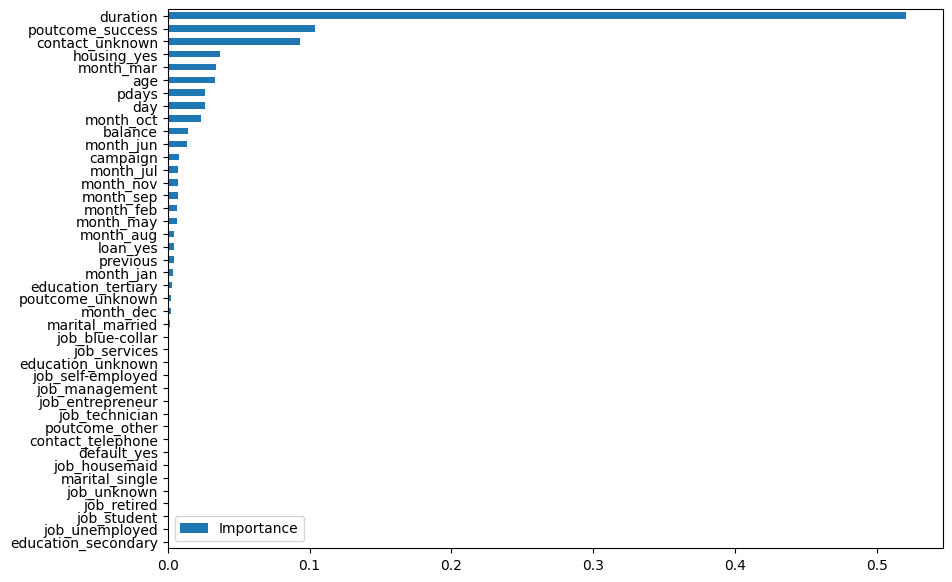

In [ ]:
print(gba.best_estimator_.feature_importances_)
feats=pd.DataFrame(data=gba.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])
feats=feats.sort_values(by='Importance')
feats.plot(kind='barh', figsize=(10, 7))

In [ ]:
imp_features=feats[feats['Importance']>0].index
print(len(imp_features))
imp_features

32


Index(['job_technician', 'job_entrepreneur', 'job_management',
       'job_self-employed', 'education_unknown', 'job_services',
       'job_blue-collar', 'marital_married', 'month_dec', 'poutcome_unknown',
       'education_tertiary', 'month_jan', 'previous', 'loan_yes', 'month_aug',
       'month_may', 'month_feb', 'month_sep', 'month_nov', 'month_jul',
       'campaign', 'month_jun', 'balance', 'month_oct', 'day', 'pdays', 'age',
       'month_mar', 'housing_yes', 'contact_unknown', 'poutcome_success',
       'duration'],
      dtype='object')

In [ ]:
X_train_new=X_train[imp_features]

X_test_new=X_test[imp_features]

In [ ]:
# Final Gradient Boost Model with best Parameters.
gb_new=GradientBoostingClassifier(n_estimators=46,learning_rate=0.3)
gb_new.fit(X_train_new, y_train)

train_pred=gb_new.predict(X_train_new)
test_pred=gb_new.predict(X_test_new)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(gb_new, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8650464777690671
Test accuracy: 0.8638602776533811
CV: 0.8062246491612454
[[1021  174]
 [ 130  908]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1195
           1       0.84      0.87      0.86      1038

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



**XGBOOST**

In [ ]:
!pip install xgboost

In [48]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train, y_train)

train_pred=xg.predict(X_train)
test_pred=xg.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(xg, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.9593459513943331
Test accuracy: 0.8674429019256605
CV: 0.803001491154995
[[1019  176]
 [ 120  918]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1195
           1       0.84      0.88      0.86      1038

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233



In [49]:
# Hyperparameter Tuning of XGB Classifier.
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators': list(range(51,101)), 'max_depth':[3,4,5], 'gamma':[0.1, 0.4, 0.6, 0.8, 1]}
xgg=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
xgg.fit(X_train, y_train)
xgg.best_params_

{'gamma': 0.4, 'max_depth': 4, 'n_estimators': 68}

[0.01675097 0.01008669 0.01427216 0.07295507 0.01260427 0.02511409
 0.00582563 0.01175434 0.00479796 0.00904448 0.00646303 0.00799998
 0.00879003 0.00938557 0.00426068 0.0056132  0.0078363  0.00717694
 0.01073588 0.00677111 0.00710776 0.01077926 0.00725608 0.
 0.07509074 0.02929889 0.00798745 0.10028975 0.01631504 0.01500219
 0.02250537 0.01557548 0.01473534 0.05553804 0.06685671 0.02893172
 0.02521416 0.04609394 0.02782376 0.00778427 0.16157566 0.        ]


<Axes: >

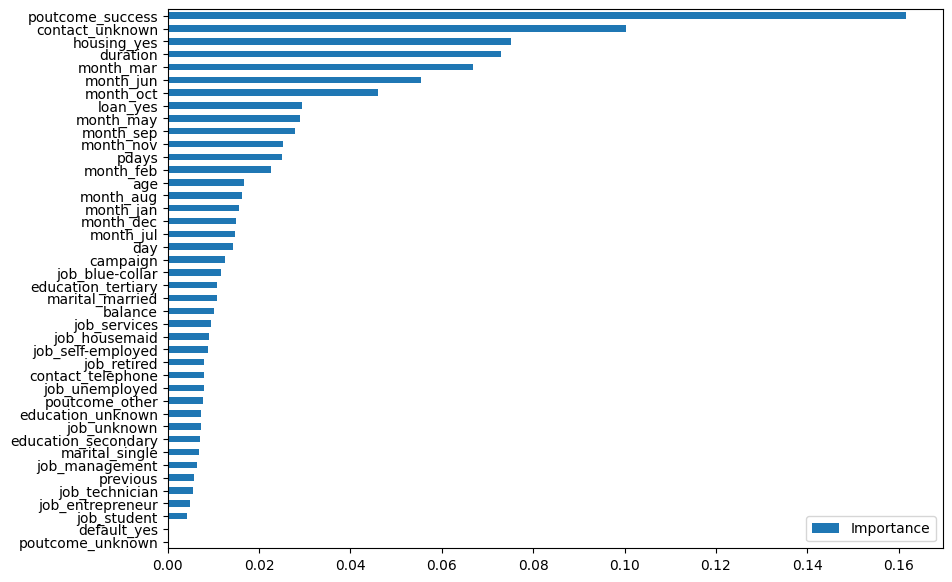

In [50]:
print(xgg.best_estimator_.feature_importances_)
feats=pd.DataFrame(data=xgg.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])
feats=feats.sort_values(by='Importance')
feats.plot(kind='barh', figsize=(10, 7))

In [51]:
imp_features=feats[feats['Importance']>0.01].index
print(len(imp_features))
imp_features

24


Index(['balance', 'marital_married', 'education_tertiary', 'job_blue-collar',
       'campaign', 'day', 'month_jul', 'month_dec', 'month_jan', 'month_aug',
       'age', 'month_feb', 'pdays', 'month_nov', 'month_sep', 'month_may',
       'loan_yes', 'month_oct', 'month_jun', 'month_mar', 'duration',
       'housing_yes', 'contact_unknown', 'poutcome_success'],
      dtype='object')

In [52]:
X_train_new=X_train[imp_features]

X_test_new=X_test[imp_features]

In [53]:
# Final XGB Classifier Model with best Parameters.
xg_new=XGBClassifier(n_estimators=68, max_depth=4, gamma=0.4)
xg_new.fit(X_train_new, y_train)

train_pred=xg_new.predict(X_train_new)
test_pred=xg_new.predict(X_test_new)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(xg_new, X, y, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8849815208869974
Test accuracy: 0.864308105687416
CV: 0.806853333911176
[[1018  177]
 [ 126  912]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1195
           1       0.84      0.88      0.86      1038

    accuracy                           0.86      2233
   macro avg       0.86      0.87      0.86      2233
weighted avg       0.87      0.86      0.86      2233



**Among all the Classification models Gradient and XG Boost has highest accuracy.**